**Leo Qian**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 3b: Polynomial Regression

In [38]:
import os
import random
import numpy as np
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: Import  datasets

1. Import training ('data/lab3b-400-training.csv') and testing ('data/lab3b-100-testing.csv') datasets into separate matrices using [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.  We will only be using y1.
3. Print the first 5 rows of each dataset.
4. Plot your dataset, column x and y1, with a title and axis labeled. 

[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]

--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]



Text(0, 0.5, 'y1')

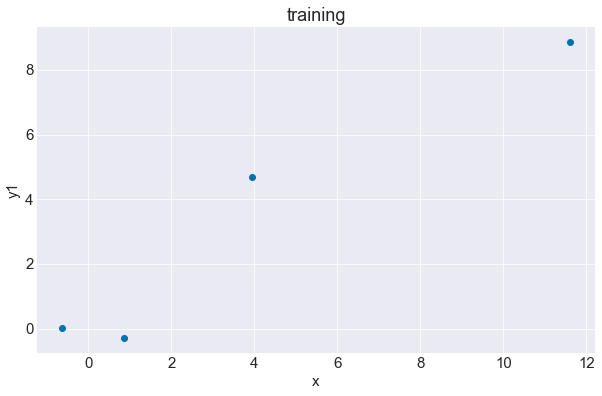

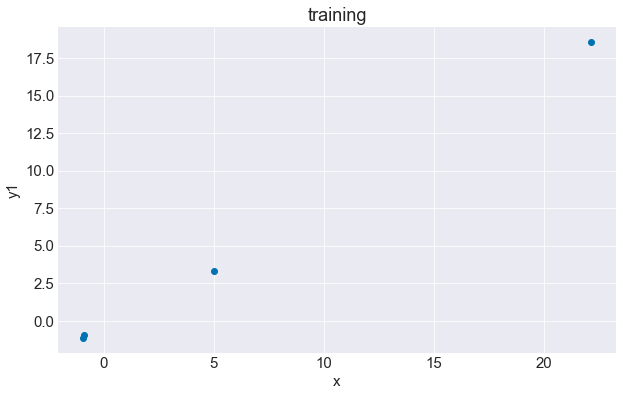

In [4]:
training = np.genfromtxt("data/lab3b-400-training.csv",delimiter=",")
testing = np.genfromtxt("data/lab3b-100-testing.csv",delimiter=",")

print(training[:5])
print(testing[:5])
print('''
--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

plt.scatter(training[0],training[1])
plt.title("training")
plt.xlabel("x")
plt.ylabel("y1")

plt.figure()
plt.scatter(testing[0],testing[1])
plt.title("training")
plt.xlabel("x")
plt.ylabel("y1")


## Task 2. 3 dimensional polynomial regression

### 2a. Make 3 polynomial matrices

$$
\left(\begin{array}{cccc} 
1 & x_0^1 & x_0^2 & x_0^3\\
1 & x_1^1 & x_1^2 & x_1^3\\
1 & x_2^1 & x_2^2 & x_2^3\\
1 & x_3^1 & x_3^2 & x_3^3\\
1 & x_4^1 & x_4^2 & x_4^3\\
... & ... & ... & ...\\
1 & x_n^1 & x_n^2 & x_n^3\\
\end{array}\right)
$$ 

1. Make a polynomial matrix for the training dataset using the independent variable
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `Ap`, with the same number of rows as the training dataset and 4 columns
    5. Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    3. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `ATp`, with the same number of rows as the test dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
1. Make a polynomial matrix to graph the prediction line
    1. For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), `line_x`, from the range of the test dataset with 100 steps
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `lineM_x`, with the same number of rows as the training dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix


In [36]:
x = training[:,0].reshape((training.shape[0],1))
y = training[:,1].reshape((training.shape[0],1))

xT = testing[:,0].reshape((testing.shape[0],1))
yT = testing[:,1].reshape((testing.shape[0],1))

Ap = np.hstack((np.ones((training.shape[0],1)),x,x**2,x**3))
ATp = np.hstack((np.ones((testing.shape[0],1)),xT,xT**2,xT**3))

line_x = np.linspace(xT.min(),xT.max(),100).reshape((100,1))
lineM_x = np.hstack((np.ones((100,1)),line_x,line_x**2,line_x**3))



print(Ap[:5])
print(ATp[:5])
print(lineM_x[:5])

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]
''')

[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.799

### 2b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable `y1`. 
2.  Calculate and print the $R^2$ value.
    

In [48]:
c,residual,rank, _ = lstsq(Ap,y)
print(c.squeeze())
print(residual)
print(rank)
yHat = Ap@c

r2 = 1 - np.sum((yHat-y)**2) / np.sum((y - np.mean(y))**2)
print(r2)
print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')


[-0.15511 -0.96979 -0.24675  1.61541]
[136.56714]
4
[0.11596]

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



### 2c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply `ATp` with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it the dependent variable `y1`.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression

2. Print the $R^2$ for the test dataset

In [49]:
yTHat = ATp@c

r2T = 1 - np.sum((yTHat-yT)**2) / np.sum((yT - np.mean(yT))**2)
print(r2T)

print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')

0.4431027176546437

--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### Task 3) Visualize the Results
In one plot:
1. Graph the training data as a scatter plot.
1. Graph the test dataset as a scatter plot.
1. Graph the prediction line
    1. the independent variable is line_x
    2. the dependent variable is lineM_x multiplied with the weights for the independent variable.
1. Include a title (with the two $R^2$ values), axis labels, and a legend

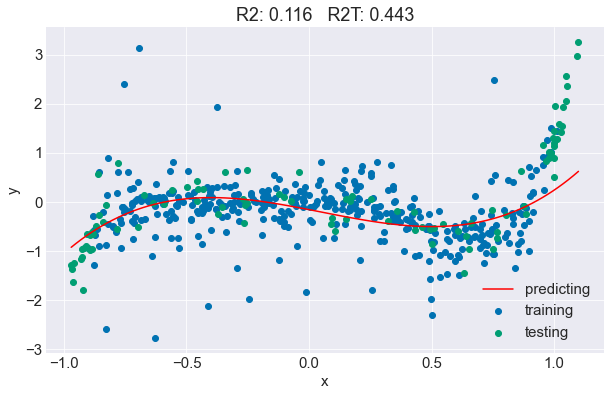

In [68]:
plt.scatter(x,y)
plt.scatter(xT,yT)

line_y = lineM_x@c.sum(axis=1)
plt.plot(line_x,line_y,"r")
plt.title(f'R2: {r2[0]:.3f}   R2T: {r2T:.3f}')
plt.ylabel("y")
plt.xlabel("x")
plt.legend(["predicting","training","testing"]);